# Speed Date analysis

Il dataset contiene informazioni riguardanti un esperimento di speed dating effettuato tra il 2002 ed il 2004 alla Columbia University.
Contiene 8000 righe riguardanti i risultati degli speed dates effettuati in questi due anni, andando ad includere sia informazioni personali sia elementi utili nel comprendere la percezione del proprio essere e di come si pensa di essere visti dalle altre persone.

In [48]:
import requests

target_url = "https://www.openml.org/data/download/13153954/speeddating.arff"
response = requests.get(target_url)
data = response.text

In [49]:
from scipy.io.arff import loadarff
from io import StringIO

received_data = loadarff(StringIO(data))

In [50]:
import pandas as pd

df = pd.DataFrame(received_data[0])

In [51]:
df.columns

Index(['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age',
       'race', 'race_o', 'samerace',
       ...
       'd_expected_num_interested_in_me', 'd_expected_num_matches', 'like',
       'guess_prob_liked', 'd_like', 'd_guess_prob_liked', 'met', 'decision',
       'decision_o', 'match'],
      dtype='object', length=123)

## Data analysis

Come notato sopra, nel file .arff sono presenti feature che non hanno una descrizione accurata presente sul sito, di conseguenza è necessario rimuoverle per eseguire un'analisi più corretta.

In [52]:
df = df[[
 'gender',
 'age',
 'age_o',
 'd_age',
 'race',
 'race_o',
 'samerace',
 'importance_same_race',
 'importance_same_religion',
 'field',
 'pref_o_attractive',
 'pref_o_sincere',
 'pref_o_intelligence',
 'pref_o_funny',
 'pref_o_ambitious',
 'pref_o_shared_interests',
 'attractive_o',
 'sinsere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
 'shared_interests_o',
 'attractive_important',
 'sincere_important',
 'intellicence_important',
 'funny_important',
 'ambtition_important',
 'shared_interests_important',
 'attractive',
 'sincere',
 'intelligence',
 'funny',
 'ambition',
 'attractive_partner',
 'sincere_partner',
 'intelligence_partner',
 'funny_partner',
 'ambition_partner',
 'shared_interests_partner',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'interests_correlate',
 'expected_happy_with_sd_people',
 'expected_num_interested_in_me',
 'expected_num_matches',
 'like',
 'guess_prob_liked',
 'met',
 'decision',
 'decision_o',
 'match']]

In [53]:
df.head()

,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,...,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
0,b'female',21.0,27.0,6.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'Law',35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,b'1',b'0',b'0'
1,b'female',21.0,22.0,1.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'Law',60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,b'1',b'0',b'0'
2,b'female',21.0,22.0,1.0,b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'Law',19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.16,3.0,2.0,4.0,7.0,NaN,1.0,b'1',b'1',b'1'
3,b'female',21.0,23.0,2.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'Law',30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0,0.0,b'1',b'1',b'1'
4,b'female',21.0,24.0,3.0,b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',2.0,4.0,b'Law',30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0,0.0,b'1',b'1',b'1'


Alcune label hanno uno spelling errato e che si discosta da quello presente originariamente nella descrizione della risorsa.

In [54]:
df.rename(columns={ 'sinsere_o': 'sincere_o', 'ambitous_o': "ambitious_o", "intellicence_important": "intelligence_important", "ambtition_important": "ambition_important" }, inplace=True)

Mi riferirò alla persona che corrisponde alla riga come `intervistato` ed all'altro come `partner`.

Le features disponibili nel dataset sono:

| Nome campo dataset | Tipo | Descrizione |
| ------------- | ------------- | ------------- |
| gender | categorical | Genere dell'intervistato |
| age | int | Età dell'intervistato |
| age_o | int | Età del partner |
| d_age | int | Differenza di età tra intervistato e partner in valore assoluto |
| race | categorical | Etnia dell'intervistato |
| race_o | categorical | Etnia del partner |
| samerace | binary | Vero se intervistato e partner sono della stessa etnia, falso altrimenti |
| importance_same_race | categorical[0-10] | Valore per indicare l'importanza che l'intervistato ha nel fatto che il suo partner debba essere della sua stessa etnia |
| importance_same_religion | categorical[0-10] | Valore per indicare l'importanza che l'intervistato ha nel fatto che il suo partner debba essere della sua stessa religione |
| field | categorical | Campo di studi dell'intervistato |
| pref_o_attractive | categorical[0-100] | Importanza che il partner da all'attrazione |
| pref_o_sincere | categorical[0-100] | Importanza che il partner da alla sincerità |
| pref_o_intelligence | categorical[0-100] | Importanza che il partner da all'intelligenza |
| pref_o_funny | categorical[0-100] | Importanza che il partner da alla simpatia |
| pref_o_ambitious | categorical[0-100] | Importanza che il partner da all'ambizione |
| pref_o_shared_interests | categorical[0-100] | Importanza che il partner da al fatto di avere interessi in comune |
| attractive_o | categorical[0-10] | Valutazione che il partner ha fornito riguardante l'attrazione dell'intervistato |
| sincere_o | categorical[0-10] | Valutazione che il partner ha fornito riguardante la sincerità dell'intervistato |
| intelligence_o | categorical[0-10] | Valutazione che il partner ha fornito riguardante l'intelligenza dell'intervistato |
| funny_o | categorical[0-10] | Valutazione che il partner ha fornito riguardante la simpatia dell'intervistato |
| ambitious_o | categorical[0-10] | Valutazione che il partner ha fornito riguardante l'ambizione dell'intervistato |
| shared_interests_o | categorical[0-10] | Valutazione che il partner ha fornito riguardante gli interessi comuni tra partner e intervistato |
| attractive_important | categorical[0-100] | Valutazione che l'intervistato ha fornito riguardante l'importanza dell'attrazione del partner nella scelta |
| sincere_important | categorical[0-100] | Valutazione che l'intervistato ha fornito riguardante l'importanza della sincerità del partner nella scelta |
| intelligence_important | categorical[0-100] | Valutazione che l'intervistato ha fornito riguardante l'importanza dell'intelligenza del partner nella scelta |
| funny_important | categorical[0-100] | Valutazione che l'intervistato ha fornito riguardante l'importanza della simpatia del partner nella scelta |
| ambition_important | categorical[0-100] | Valutazione che l'intervistato ha fornito riguardante l'importanza dell'ambizione del partner nella scelta |
| shared_interests_important | categorical[0-100] | Valutazione che l'intervistato ha fornito riguardante l'importanza nell'avere interessi in comune con il partner nella scelta |
| attractive | categorical[0-10] | Valutazione che l'intervistato ha fornito su sè stesso riguardante l'attrazione |
| sincere | categorical[0-10] | Valutazione che l'intervistato ha fornito su sè stesso riguardante la sincerità |
| intelligence | categorical[0-10] | Valutazione che l'intervistato ha fornito su sè stesso riguardante l'intelligenza |
| funny | categorical[0-10] | Valutazione che l'intervistato ha fornito su sè stesso riguardante la simpatia |
| ambition | categorical[0-10] | Valutazione che l'intervistato ha fornito su sè stesso riguardante l'ambizione |
| attractive_partner | categorical[0-10] | Valutazione che l'intervistato ha fornito sul partner riguardante l'attrazione |
| sincere_partner | categorical[0-10] | Valutazione che l'intervistato ha fornito sul partner riguardante la sincerità |
| intelligence_partner | categorical[0-10] | Valutazione che l'intervistato ha fornito sul partner riguardante l'intelligenza |
| funny_partner | categorical[0-10] | Valutazione che l'intervistato ha fornito sul partner riguardante la simpatia |
| ambition_partner | categorical[0-10] | Valutazione che l'intervistato ha fornito sul partner riguardante l'ambizione |
| shared_interests_partner | categorical[0-10] | Valutazione che l'intervistato ha fornito sul partner riguardante gli interessi in comune |
| sports | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per gli sport |
| tvsports | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per gli sport in TV |
| exercise | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per l'esercizio fisico |
| dining | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per il cibo |
| museums | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per i musei |
| art | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per l'arte |
| hiking | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per l'escursionismo |
| gaming | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per i videogiochi |
| clubbing | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per le discoteche |
| reading | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per la lettura |
| tv | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per la TV |
| theater | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per il teatro |
| movies | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per i film |
| concerts | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per i concerti |
| music | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per la musica |
| shopping | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per lo shopping |
| yoga | categorical[0-10] | Valutazione che l'intervistato ha fornito sull'interesse che ha per lo yoga |
| interests_correlate | float [-1, 1] | Correlazione tra gli interessi dell'intervistato e del partner |
| expected_happy_with_sd_people | categorical[0-10] | Valutazione di felicità che l'intervistato si aspetta nei vari speed dates che andrà a effettuare |
| expected_num_interested_in_me | categorical[0-20] | Numero di persone che l'intervistato si aspetta che saranno interessate nell'avere un appuntamento con lui |
| expected_num_matches | int | Numero di persone con cui l'intervistato pensa di avere un match |
| like | categorical[0-10] | Valutazione dell'intervistato sul partner |
| guess_prob_liked | categorical[0-10] | Valutazione dell'intervistato sulla valutazione che può aver dato il partner su di lui |
| met | binary | Vero se intervistato e partner si sono già incontrati in precedenza, falso altrimenti |
| decision | binary | Vero se l'intervistato desidererebbe avere un match |
| decision_o | binary | Vero se il partner desidererebbe avere un match |
| match | binary | Vero se l'intervistato ed il partner desidererebbero avere un match |


La variabile target, come si può dedurre dalle descrizioni, è `match`.

## Data cleaning
In questa sezione è necessario apportare modifiche al dataset in maniera tale da poter rispecchiare sia la tabella fornita sopra, che normalizzare i dati per evitare di avere errori che potrebbe incidere negativamente sui modelli di classificazione

Inizialmente è necessario modificare alcuni tipi di dati per poterli poi manipolare. Mi riferisco alle stringhe che sono codificate come `object` e ai numeri che è preferibile avere in `float64`

In [55]:
str_df = df.select_dtypes([object])
str_df = str_df.stack().str.decode('utf-8').unstack()
for col in str_df:
    df[col] = str_df[col]

In [56]:
from numpy import float64


df['match'] = df['match'].astype(float64)
df['decision'] = df['decision'].astype(float64)
df['decision_o'] = df['decision_o'].astype(float64)
df['met'].fillna(0, inplace=True)
df['met'] = df['met'].astype(float64)
df['samerace'] = df['samerace'].astype(float64)

In [57]:
df['d_age'].mean()

4.1856051563619

In [58]:
(df['age'] - df['age_o']).abs().mean()

3.658435207823961

Come si può notare, la colonna `d_age` ha un errore di calcolo, di conseguenza vado ad impostare i valori corretti avendo a disposizione entrambi le età

In [59]:
df['d_age'] = (df['age'] - df['age_o']).abs()

Considerando il fatto che l'esperimento viene eseguito a coppie, andare a verificare che chi ha un interesse X ha più probabilità di avere un match rispetto a chi ha l'interesse Y è sia errato perchè ci possono essere alcune feature strettamente dipendenti, sia inutili perchè le identità del partner sono anonime e di conseguenza non si conosco gli interessi del partner.<br>
Di conseguenza devono essere rimosse dal dataset tutte le feature riguardanti gli interessi specifici, lasciando però quelle riguardanti quelli comuni.

Inoltre ci sono feature come `expected_num_interested_in_me` che non sono necessari ai fini dell'analisi visto che non si hanno identificativi di chi ha risposto al sondaggio.<br>
Anche le età non sono comparabili in sè, l'unica feature riguardante l'età che può risultare utile è la differenza tra intervistato e partner.

In [60]:
parsed_df = df.drop([
    'sports',
    'tvsports',
    'exercise',
    'dining',
    'museums',
    'art',
    'hiking',
    'gaming',
    'clubbing',
    'reading',
    'tv',
    'theater',
    'movies',
    'concerts',
    'music',
    'shopping',
    'yoga',
    'expected_happy_with_sd_people',
    'expected_num_interested_in_me',
    'expected_num_matches',
    'decision',
    'decision_o',
    'age',
    'age_o',
    'gender',
    'race',
    'race_o',
    'field'
], axis=1)

In [61]:
pd.options.display.max_columns = parsed_df.shape[1]
parsed_df.describe()

,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitious_o,shared_interests_o,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,like,guess_prob_liked,met,match
count,8180.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8220.000000,8138.000000,8069.000000,8378.000000,8378.000000
mean,3.658435,0.395799,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,0.196010,6.134087,5.207523,0.047625,0.164717
std,3.061014,0.489051,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,1.395783,1.407460,1.564321,1.076608,1.778315,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,0.303539,1.841285,2.129565,0.275972,0.370947
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.830000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,-0.020000,5.000000,4.000000,0.000000,0.000000
50%,3.000000,0.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,0.210000,6.000000,5.000000,0.000000,0.000000
75%,5.000000,1.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,15.000000,16.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,25.000000,20.000000,23.810000,20.000000,15.000000,16.000000,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,0.430000,7.000000,7.000000,0.000000,0.000000
max,32.000000,1.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,10.500000,10.000000,10.000000,11.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.910000,10.000000,10.000000,8.000000,1.000000


Possiamo notare come ci siano valori che non sono coerenti con il nostro dataset e con le descrizioni fornite.<br>
Di conseguenza vanno eliminate le righe che presentano questi valori errati.

In [62]:
parsed_df.drop(parsed_df[parsed_df['d_age'] >= 10].index, inplace=True)
parsed_df.drop(parsed_df[(parsed_df['met'] != 0.0) & (parsed_df['met'] != 1.0)].index, inplace=True)
parsed_df.drop(parsed_df[parsed_df['attractive_o'] > 10].index, inplace=True)
parsed_df.drop(parsed_df[parsed_df['funny_o'] > 10].index, inplace=True)

In [63]:
parsed_df.describe()

,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitious_o,shared_interests_o,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,like,guess_prob_liked,met,match
count,7808.000000,8006.000000,7927.000000,7927.000000,7917.000000,7917.000000,7917.000000,7908.000000,7899.000000,7877.000000,7797.000000,7727.000000,7711.000000,7671.000000,7338.000000,7002.000000,7927.000000,7927.000000,7927.000000,7917.000000,7907.000000,7885.000000,7901.000000,7901.000000,7901.000000,7901.000000,7901.000000,7807.000000,7736.000000,7720.000000,7681.000000,7347.000000,7010.000000,7848.000000,7769.000000,7706.000000,8006.000000,8006.000000
mean,3.249103,0.388958,3.795887,3.649300,22.548752,17.390882,20.258925,17.462476,10.683951,11.817339,6.181082,7.159570,7.361756,6.399492,6.779027,5.458155,22.577408,17.386965,20.254025,17.462298,10.678162,11.811089,7.087584,8.304518,7.709530,8.410834,7.585369,6.181619,7.159255,7.360168,6.398711,6.776848,5.456205,0.195083,6.126722,5.221840,0.042843,0.167499
std,2.329040,0.487544,2.853734,2.806239,12.679924,7.021647,6.805496,6.113039,6.129412,6.360029,1.950847,1.741302,1.551897,1.956219,1.798715,2.161698,12.699523,7.029010,6.807779,6.115008,6.125443,6.361103,1.400334,1.403852,1.571195,1.074116,1.775418,1.950784,1.741014,1.551688,1.955584,1.798160,2.161349,0.304196,1.838816,2.129305,0.202515,0.373444
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.730000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,15.000000,15.000000,17.500000,15.000000,5.000000,9.520000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.500000,15.000000,5.000000,9.090000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,-0.020000,5.000000,4.000000,0.000000,0.000000
50%,3.000000,0.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.530000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.530000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,0.210000,6.000000,5.000000,0.000000,0.000000
75%,5.000000,1.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,15.000000,15.690000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,25.000000,20.000000,23.810000,20.000000,15.000000,15.690000,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,0.430000,7.000000,7.000000,0.000000,0.000000
max,9.000000,1.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.910000,10.000000,10.000000,1.000000,1.000000


Andiamo a controllare ora i valori nulli, che andremo ad impostare a 0.0 per normalizzare i dati

In [64]:
parsed_df.isna().sum()

d_age                          198
samerace                         0
importance_same_race            79
importance_same_religion        79
pref_o_attractive               89
pref_o_sincere                  89
pref_o_intelligence             89
pref_o_funny                    98
pref_o_ambitious               107
pref_o_shared_interests        129
attractive_o                   209
sincere_o                      279
intelligence_o                 295
funny_o                        335
ambitious_o                    668
shared_interests_o            1004
attractive_important            79
sincere_important               79
intelligence_important          79
funny_important                 89
ambition_important              99
shared_interests_important     121
attractive                     105
sincere                        105
intelligence                   105
funny                          105
ambition                       105
attractive_partner             199
sincere_partner     

Come possiamo notare ed anche come potevamo aspettarci, ci sono dei campi nulli che vanno quindi popolati per avere tutti i dati normalizzati. Questi dati nulli sono comprensibili dato che, anche se la ricerca è stata effettuata in maniera anonima, è sensato che alcuni non desideravano esprimere la propria opinione sul partner dello speed date

In [65]:
parsed_df.fillna(0.0, inplace=True)

Controlliamo ora che non ci siano più dati nulli e facciamo un describe per verificare numero, media e deviazione standard dei nostri dati

In [66]:
parsed_df.isna().sum()

d_age                         0
samerace                      0
importance_same_race          0
importance_same_religion      0
pref_o_attractive             0
pref_o_sincere                0
pref_o_intelligence           0
pref_o_funny                  0
pref_o_ambitious              0
pref_o_shared_interests       0
attractive_o                  0
sincere_o                     0
intelligence_o                0
funny_o                       0
ambitious_o                   0
shared_interests_o            0
attractive_important          0
sincere_important             0
intelligence_important        0
funny_important               0
ambition_important            0
shared_interests_important    0
attractive                    0
sincere                       0
intelligence                  0
funny                         0
ambition                      0
attractive_partner            0
sincere_partner               0
intelligence_partner          0
funny_partner                 0
ambition

In [67]:
parsed_df.describe()

,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitious_o,shared_interests_o,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,like,guess_prob_liked,met,match
count,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000
mean,3.168748,0.388958,3.758431,3.613290,22.298085,17.197553,20.033713,17.248721,10.541160,11.626927,6.019723,6.910067,7.090495,6.131714,6.213402,4.773670,22.354623,17.215397,20.054167,17.268175,10.546119,11.632581,6.994629,8.195603,7.608419,8.300525,7.485886,6.027967,6.917812,7.097240,6.138958,6.219023,4.777417,0.191233,5.945353,5.026168,0.042843,0.167499
std,2.354764,0.487544,2.864302,2.815562,12.828991,7.216686,7.093112,6.371752,6.210707,6.481690,2.162846,2.156560,2.059914,2.304081,2.545640,2.711967,12.832270,7.202317,7.063779,6.350602,6.200785,6.475244,1.607943,1.684544,1.790439,1.433295,1.963563,2.153435,2.144613,2.046464,2.294309,2.537075,2.708036,0.302399,2.087958,2.312494,0.202515,0.373444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.730000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,15.000000,14.710000,17.310000,15.000000,5.000000,8.000000,5.000000,6.000000,6.000000,5.000000,5.000000,3.000000,15.000000,15.000000,17.310000,15.000000,5.000000,8.000000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,3.000000,-0.010000,5.000000,4.000000,0.000000,0.000000
50%,3.000000,0.000000,3.000000,3.000000,20.000000,18.000000,20.000000,18.000000,10.000000,10.000000,6.000000,7.000000,7.000000,6.000000,7.000000,5.000000,20.000000,18.000000,20.000000,18.000000,10.000000,10.000000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,6.000000,7.000000,5.000000,0.200000,6.000000,5.000000,0.000000,0.000000
75%,5.000000,1.000000,6.000000,6.000000,25.000000,20.000000,23.260000,20.000000,15.000000,15.560000,7.500000,8.000000,8.000000,8.000000,8.000000,7.000000,25.000000,20.000000,23.260000,20.000000,15.000000,15.560000,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,0.430000,7.000000,7.000000,0.000000,0.000000
max,9.000000,1.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.910000,10.000000,10.000000,1.000000,1.000000


## Data visualization

In [68]:
match_col = parsed_df.pop('match')
parsed_df.insert(parsed_df.shape[1], 'match', match_col)

parsed_df

,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitious_o,shared_interests_o,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,like,guess_prob_liked,met,match
0,6.0,0.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,7.0,6.0,0.0,0.0
1,1.0,0.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,7.0,5.0,1.0,0.0
2,1.0,1.0,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,7.0,0.0,1.0,1.0
3,2.0,0.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,7.0,6.0,0.0,1.0
4,3.0,0.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,6.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1.0,0.0,1.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,10.0,5.0,3.0,2.0,6.0,5.0,70.0,0.0,15.0,15.0,0.0,0.0,8.0,7.0,6.0,7.0,7.0,3.0,5.0,5.0,5.0,0.0,0.0,0.64,2.0,5.0,0.0,0.0
8374,1.0,0.0,1.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,6.0,3.0,7.0,3.0,7.0,2.0,70.0,0.0,15.0,15.0,0.0,0.0,8.0,7.0,6.0,7.0,7.0,4.0,6.0,8.0,4.0,4.0,0.0,0.71,4.0,4.0,0.0,0.0
8375,4.0,0.0,1.0,1.0,40.0,10.0,30.0,10.0,10.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,70.0,0.0,15.0,15.0,0.0,0.0,8.0,7.0,6.0,7.0,7.0,4.0,7.0,8.0,8.0,8.0,0.0,-0.46,6.0,5.0,0.0,0.0
8376,3.0,0.0,1.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,5.0,7.0,5.0,5.0,3.0,6.0,70.0,0.0,15.0,15.0,0.0,0.0,8.0,7.0,6.0,7.0,7.0,4.0,6.0,5.0,4.0,0.0,5.0,0.62,5.0,5.0,0.0,0.0


Andiamo a visualizzare la distribuzione della variabile target `match` nel nostro dataset

<AxesSubplot:ylabel='match'>

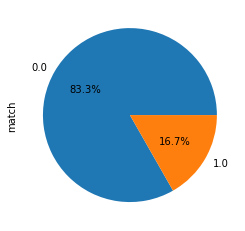

In [69]:
parsed_df['match'].value_counts().plot.pie(autopct='%1.1f%%')

Come si può notare dal grafico a torta e da come ci potevamo aspettare in termini puramente statistici, la variabile target è fortemente sbilanciata; questo sbilanciamento è anche causato dal fatto che un valore pari a 0 della variabile match si ripercuote due volte nel dataset.

Andiamo a correlare tutte le variabili per ottenere una visione più chiara su quelle che incidono maggiormente sul valore della variabile target `match` che poi verrà mostrata attraverso una classica Heatmap

In [70]:
correlations = parsed_df.corr()

<AxesSubplot:>

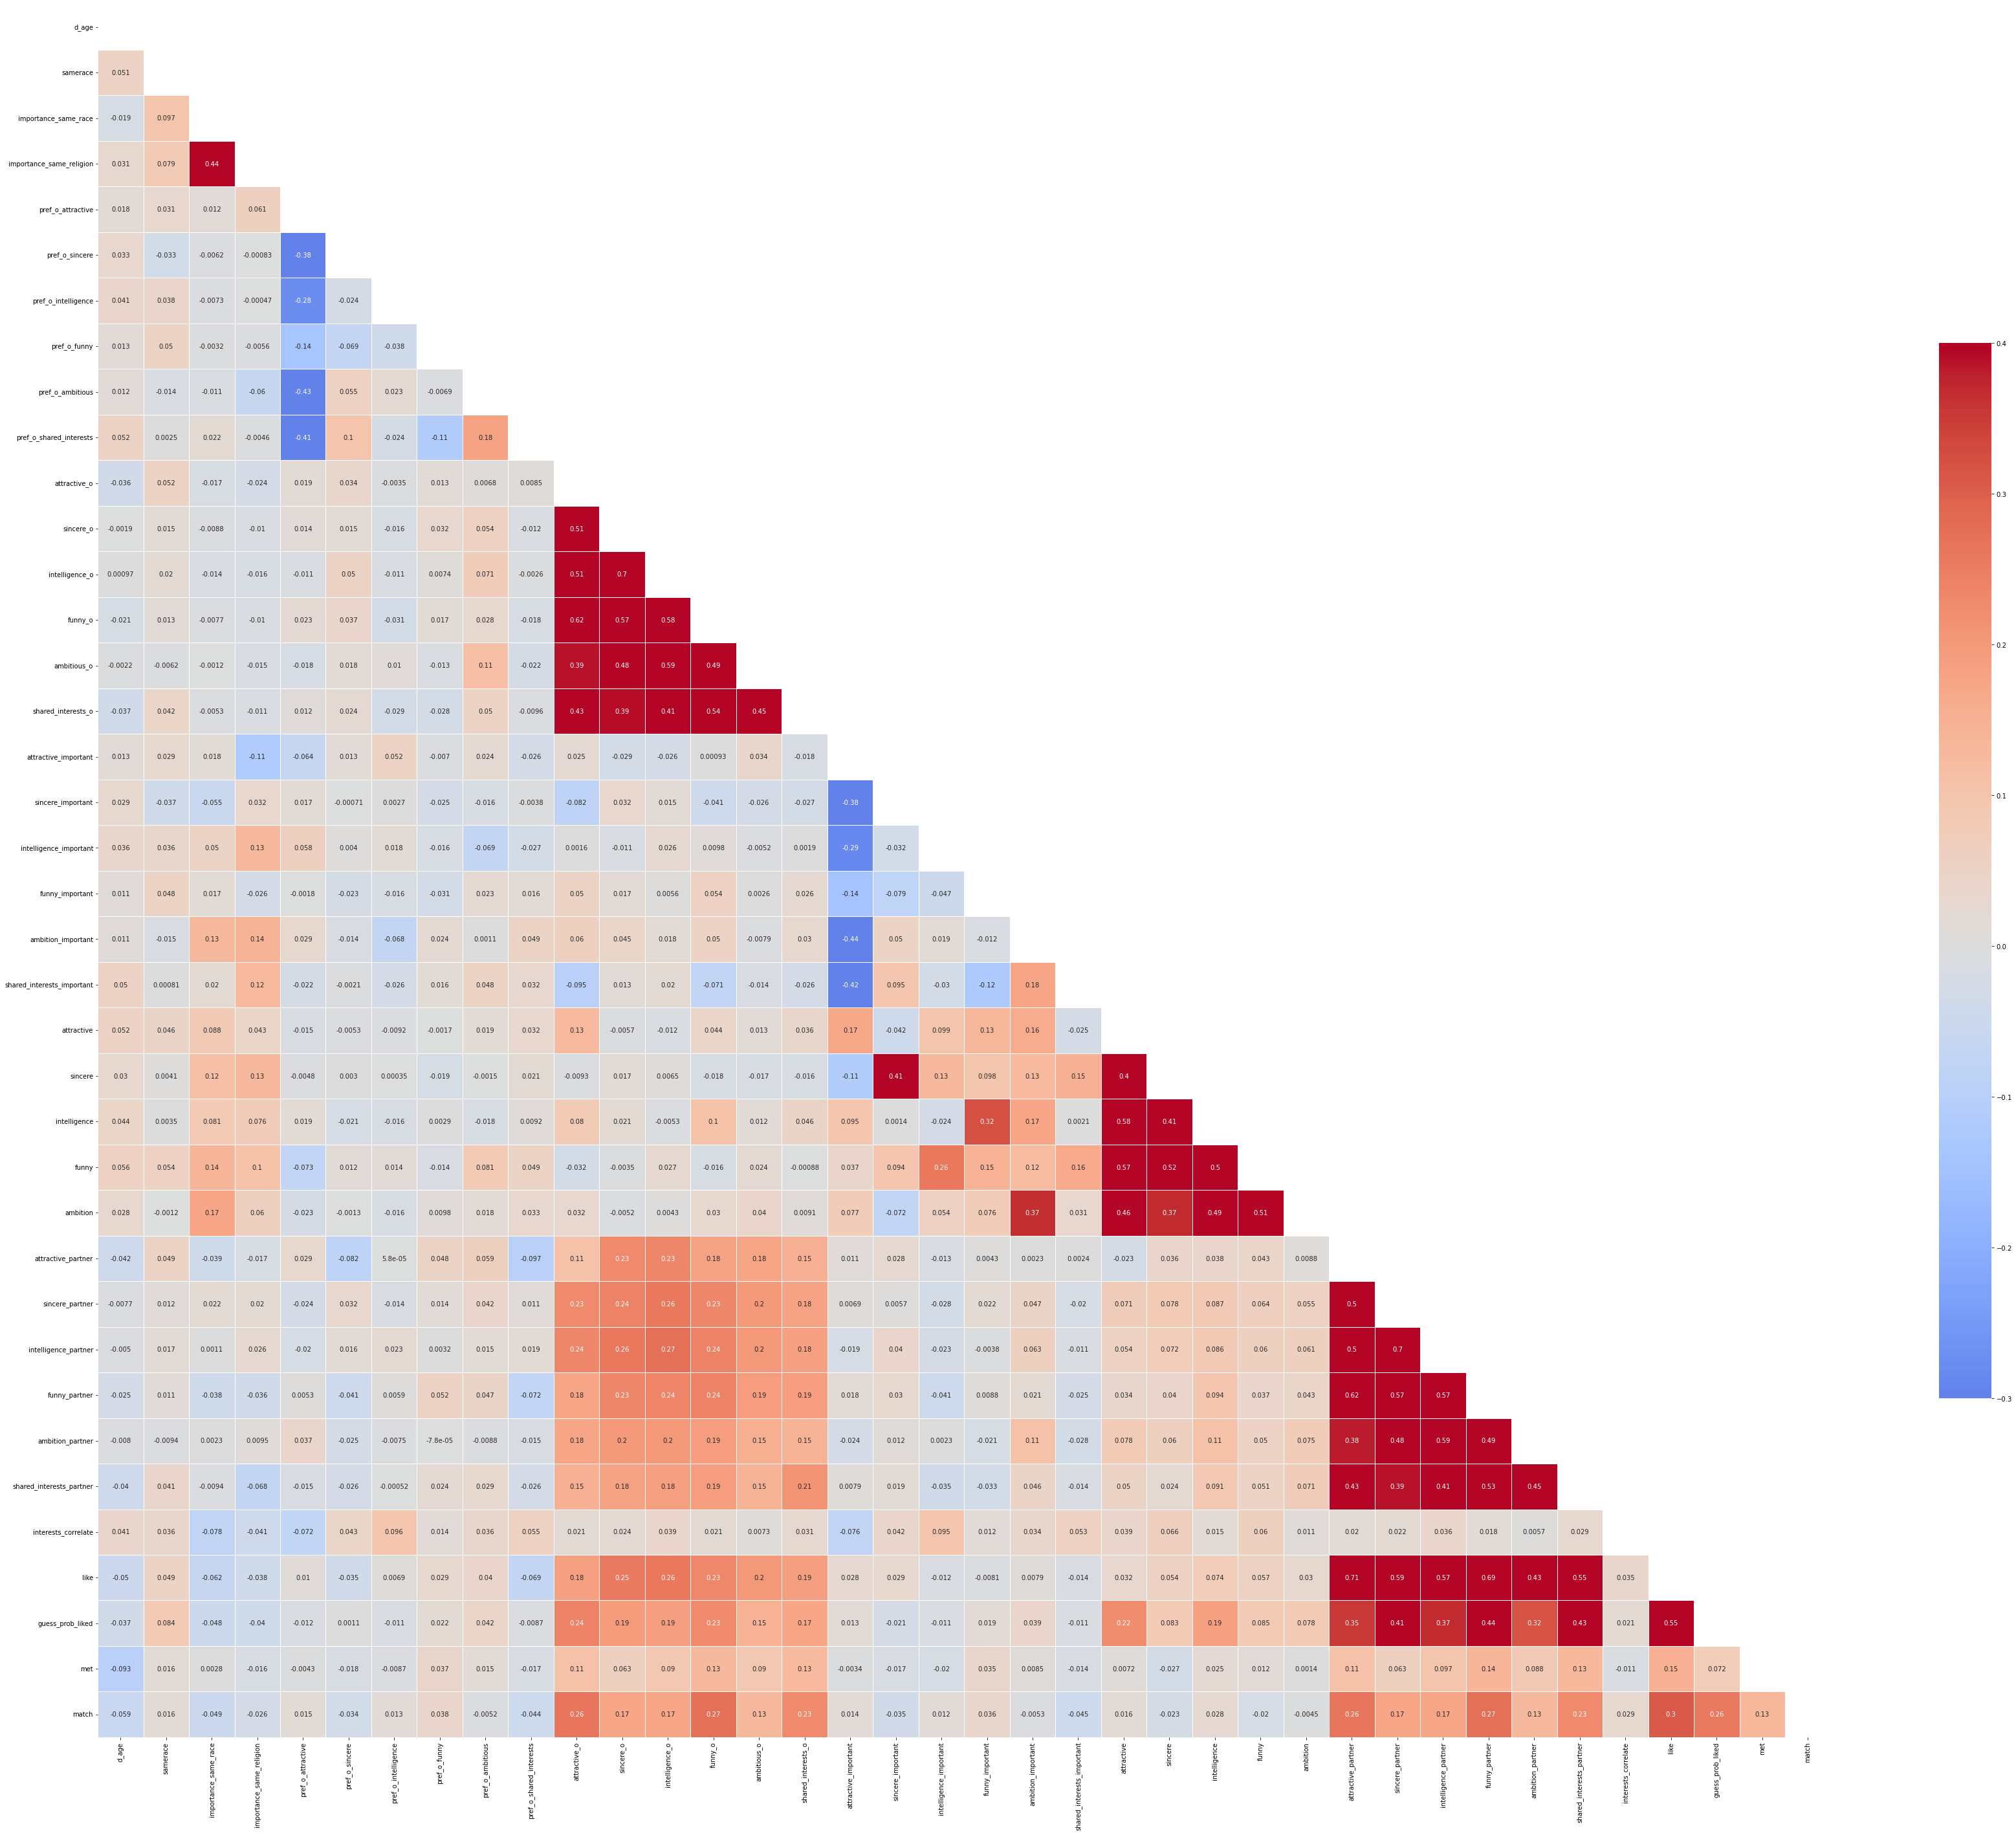

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Genero una palette per una Heatmap che ha i classici colori da freddo a caldo
palette = sns.color_palette('coolwarm', as_cmap=True)
# Viene generata una maschera per poter avere il triangolo superiore in bianco
upper_mask = np.zeros_like(correlations, dtype=bool)
upper_mask[np.triu_indices_from(upper_mask)] = True

# Dovendo essere un quadrato abbastanza grande da ospitare tutte le features, vado a definire un 60x60 per avere anche una maggiore visibilità
plt.subplots(figsize=(60, 60))
sns.heatmap(correlations, mask=upper_mask, cmap=palette, vmax=.4, vmin=-.3, center=0,annot = True, square=True, linewidths=1, cbar_kws={"shrink": .5})

## Data analysis
Analisi, attraverso opportuni metodi di classificazione, dei dati.<br>
Tutti i metodi utilizzati prevedono lo stesso livello di confidenza in maniera tale da avere risultati consistenti.<br>
Lo split tra il testing ed il validation set è il classico 70/30 e vengono utilizzati stati ben definiti per consentire risultati deterministici.

In [72]:
X = parsed_df.drop('match', axis=1)
y = parsed_df['match']

Vado ad individuare funzioni e variabili che mi serviranno per tutte le analisi.

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=26, stratify=y.values)

In [74]:
from statsmodels.stats.proportion import proportion_confint

def confidence_interval(value_count, score, confidence):    
    return proportion_confint(value_count * score, value_count, 1-confidence/100, method='wilson')

In [75]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greys')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    names = [['True positive','False negative'],['False positive','True negative']]


    threshold = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f} -> {name}".format(cm[i, j], names[i][j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black")
        else:
            plt.text(j, i, "{:,} -> {}".format(cm[i, j], names[i][j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Accuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [76]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


def generate_reports(cv: GridSearchCV, estimator_features = lambda x: x.best_estimator_[1].coef_[0] ):
    print('Best parameters:', cv.best_params_)
    print('Best score: {:.4f}%'.format(round(cv.best_score_ * 100, 4)))

    # Ottengo le probabilità minime e massime data una confidenza del 95%
    confidence = 95

    lower_bound, upper_bound = confidence_interval(len(X_train), cv.score(X_val, y_val), confidence)

    print('Probabilities with confidence set at {}%: \npMin = {:.4f}%\npMax = {:.4f}%'.format(confidence, lower_bound*100, upper_bound*100))

    model_coefficients = pd.Series(estimator_features(cv), index=X_train.columns)
    model_coefficients.nlargest(4).plot(kind='barh', title='Top 4 features')

    # Ottengo e mostro la confusion matrix, andando prima a predire i valori sul validation set
    
    prediction = cv.predict(X_val)
    cm = confusion_matrix(y_val, prediction)

    plot_confusion_matrix(cm, target_names=['No match', 'Match'], normalize=False)


    print('Classification Report')

    classification_results = pd.DataFrame.from_dict(classification_report(y_val, prediction, output_dict=True))

    # Rimuovo tutti i valori nella colonna 'accuracy' perchè tutti uguali, come valore interessa solo quella nella riga 'f1-score'
    classification_results['accuracy'] = ['', '', classification_results['accuracy'][2], '']


    with pd.option_context('display.float_format', '{:.2f}'.format):
        display(classification_results.transpose())

    
    mse = mean_squared_error(y_val, prediction)
    print('MSE: {}'.format(mse))

    return model_coefficients, mse, prediction, classification_results

### Perceptron

Come primo metodo utilizzo Perceptron con un Grid Search con un k-fold a 5

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

std_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True, n_iter_no_change=5, random_state=42))
])


parameters = {
    'std': [None, StandardScaler()],
    'perceptron__penalty': [None, 'l1', 'l2', 'elasticnet'],
    'perceptron__alpha': [0.0001, 0.001, 0.01, 1],
    'perceptron__tol': [1e-9, 1e-6, 1e-3, 1, 1e3, 1e6],
}

perceptron_cv = GridSearchCV(std_perceptron, parameters, cv=5, n_jobs=-1, scoring='f1')
perceptron_cv.fit(X_train, y_train)

print('DONE')

DONE


Best parameters: {'perceptron__alpha': 0.0001, 'perceptron__penalty': 'elasticnet', 'perceptron__tol': 1000.0, 'std': StandardScaler()}
Best score: 41.7445%
Probabilities with confidence set at 95%: 
pMin = 40.2386%
pMax = 42.8180%


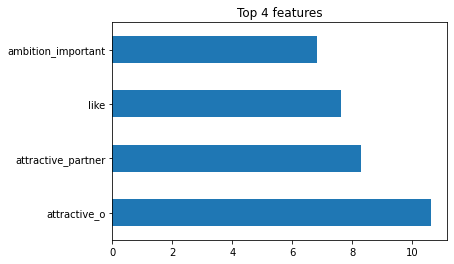

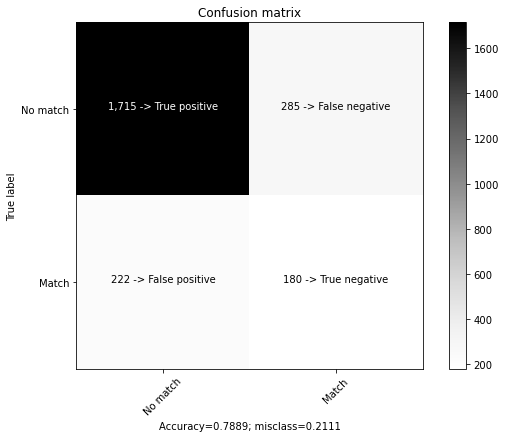

Classification Report


,precision,recall,f1-score,support
0.0,0.89,0.86,0.87,2000.00
1.0,0.39,0.45,0.42,402.00
accuracy,,,0.79,
macro avg,0.64,0.65,0.64,2402.00
weighted avg,0.80,0.79,0.79,2402.00


MSE: 0.21107410491257286


In [78]:
perceptron_model, perceptron_mse, perceptron_prediction, perceptron_cr = generate_reports(perceptron_cv)

### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = Pipeline([
    ('std', StandardScaler()),
    ('rfc', RandomForestClassifier(n_jobs=-1, random_state=42))
])

parameters = {
    'rfc__n_estimators': [100, 200, 300],
    'rfc__max_depth': [2, 4, 6, 8, 10],
    'rfc__min_samples_leaf': [1, 2, 4],
    'rfc__min_samples_split': [2, 5, 10],
}
    

rfc_cv = GridSearchCV(rfc, parameters, cv=5, n_jobs=-1, return_train_score=True, scoring='f1')
rfc_cv.fit(X_train, y_train)

print('Random Forest GridSearch finish')

Random Forest GridSearch finish


Best parameters: {'rfc__max_depth': 10, 'rfc__min_samples_leaf': 2, 'rfc__min_samples_split': 5, 'rfc__n_estimators': 200}
Best score: 35.3881%
Probabilities with confidence set at 95%: 
pMin = 34.6036%
pMax = 37.1139%


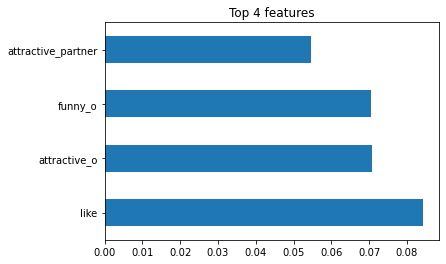

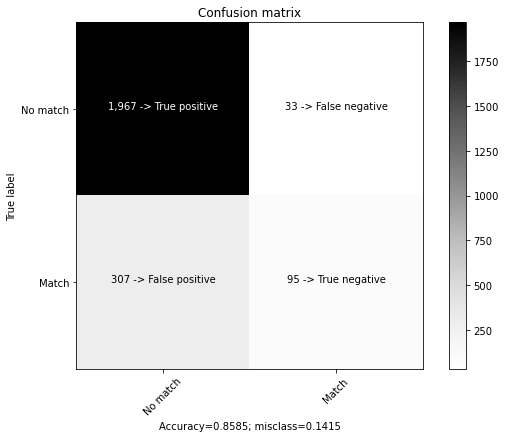

Classification Report


,precision,recall,f1-score,support
0.0,0.86,0.98,0.92,2000.00
1.0,0.74,0.24,0.36,402.00
accuracy,,,0.86,
macro avg,0.80,0.61,0.64,2402.00
weighted avg,0.84,0.86,0.83,2402.00


MSE: 0.14154870940882597


In [80]:
rfc_model, rfc_mse, rfc_prediction, rfc_cr = generate_reports(rfc_cv, lambda cv: cv.best_estimator_[1].feature_importances_)

### XGBoost

In [81]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_xgb = Pipeline([
    ('std', StandardScaler()),
    ('xgb', XGBClassifier(nthread=8, objective='binary:logistic',use_label_encoder=False))
])

parameters = {
    'xgb__eta': [0.002, 0.1, 0.5],
    'xgb__max_depth': [6],
    'xgb__n_estimators': [150, 300],
    'xgb__alpha': [0.0001, 0.001]
}

xgb_cv = GridSearchCV(std_xgb, parameters, cv=3, n_jobs=-1, return_train_score=True, scoring='accuracy')
xgb_cv.fit(X_train, y_train)
print("Grid Search Xgboost finish")

[15:41:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Grid Search Xgboost finish


Best parameters: {'xgb__alpha': 0.0001, 'xgb__eta': 0.1, 'xgb__max_depth': 6, 'xgb__n_estimators': 150}
Best score: 85.6888%
Probabilities with confidence set at 95%: 
pMin = 86.0196%
pMax = 87.7849%


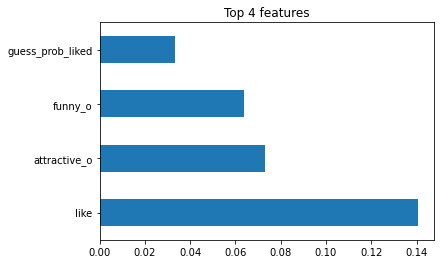

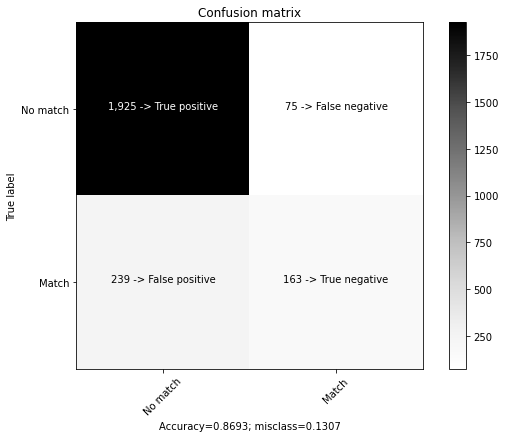

Classification Report


,precision,recall,f1-score,support
0.0,0.89,0.96,0.92,2000.00
1.0,0.68,0.41,0.51,402.00
accuracy,,,0.87,
macro avg,0.79,0.68,0.72,2402.00
weighted avg,0.86,0.87,0.86,2402.00


MSE: 0.13072439633638636


In [82]:
xgb_model, xgb_mse, xgb_prediction, xgb_cr = generate_reports(xgb_cv, lambda cv: cv.best_estimator_[1].feature_importances_)

### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

std_lr = Pipeline([
    ('std', StandardScaler()),
    ('lr', LogisticRegression(dual=False))
])

parameters = {
    'lr__penalty': ['l1'],
    'lr__tol': [1e-9, 1e-6, 1e-3, 1e-2, 1e-1, 1],
    'lr__C': [1, 0.8, 0.3],
    'lr__solver': ['liblinear']
}

lr_cv = GridSearchCV(std_lr, parameters, cv=5, n_jobs=-1, return_train_score=True, scoring='f1')
lr_cv.fit(X_train, y_train)
print("Grid search finish")

Grid search finish


Best parameters: {'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver': 'liblinear', 'lr__tol': 1e-09}
Best score: 41.0110%
Probabilities with confidence set at 95%: 
pMin = 40.2256%
pMax = 42.8049%


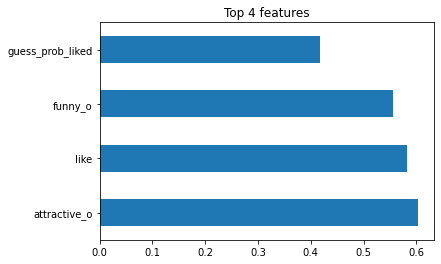

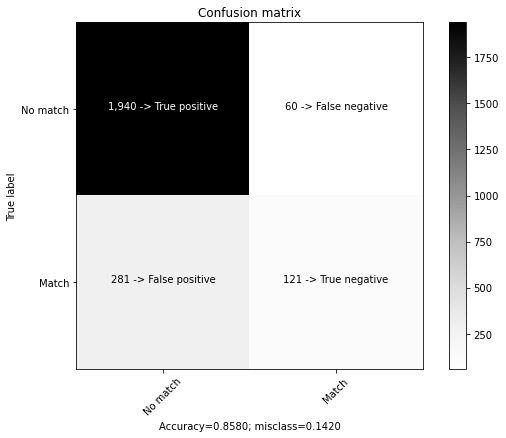

Classification Report


,precision,recall,f1-score,support
0.0,0.87,0.97,0.92,2000.00
1.0,0.67,0.30,0.42,402.00
accuracy,,,0.86,
macro avg,0.77,0.64,0.67,2402.00
weighted avg,0.84,0.86,0.83,2402.00


MSE: 0.14196502914238135


In [84]:
lr_model, lr_mse, lr_prediction, lr_cr = generate_reports(lr_cv)

## Models comparison

In questo step vado a comparare i vari modelli per controllare se possono essere mutualmente validi, questo accade solamente se l'intervallo comprende il valore 0

In [85]:
def model_comparison(mse_1, mse_2):
    d = np.abs(mse_1 - mse_2)
    variance = (mse_1 * (1 - mse_1)) / len(X_val) + (mse_2 * (1 - mse_2)) / len(X_val)
    d_min = d - 1.96 * np.sqrt(variance)
    d_max = d + 1.96 * np.sqrt(variance)
    return (d_min, d_max)

### Perceptron vs Random Forest

In [86]:
print('Interval {}'.format(np.round(model_comparison(perceptron_mse, rfc_mse), 4)))

Interval [0.0481 0.091 ]


### Perceptron vs XGBoost

In [87]:
print('Interval {}'.format(np.round(model_comparison(perceptron_mse, xgb_mse), 4)))

Interval [0.0592 0.1015]


### Perceptron vs Logistic Regression

In [88]:
print('Interval {}'.format(np.round(model_comparison(perceptron_mse, lr_mse), 4)))

Interval [0.0476 0.0906]


### XGBoost vs Random Forest

In [89]:
print('Interval {}'.format(np.round(model_comparison(xgb_mse, rfc_mse), 4)))

Interval [-0.0086  0.0302]


### XGBoost vs Logistic Regression

In [90]:
print('Interval {}'.format(np.round(model_comparison(xgb_mse, lr_mse), 4)))

Interval [-0.0082  0.0306]


### Logistic Regression vs Random Forest

In [91]:
print('Interval {}'.format(np.round(model_comparison(lr_mse, rfc_mse), 4)))

Interval [-0.0193  0.0201]


Come possiamo notare, la maggior parte dei modelli è simile come si poteva prevedere date le similarità nell'`accuracy` e nell'`f1-score`.
Perceptron ha un'`accuracy` e un `f1-score` molto differenti dagli altri modelli, andando anche a raggiungere il 7 punti percentuali. Di conseguenza ci si può aspettare che non possa essere comparabile con gli altri algoritmi di classificazione.

## Best model e discussione finale sui risultati

Dopo aver determinato che Perceptron non è comparabile con gli altri modelli, vado a determinare il miglior modello, cioè colui che fornisce il valore minimo del Mean-Squared-Error<br>
Avendolo determinato vengono poi visualizzate le feature più importanti senza alcun limite sul numero.

In [92]:
import functools

all_models = [
    { "label": "XGBoost", "value": xgb_mse, "features": xgb_model, "classification_results": xgb_cr },
    { "label": "Logistic Regression", "value": lr_mse, "features": lr_model, "classification_results": lr_cr },
    { "label": "Random Forest", "value": rfc_mse, "features": rfc_model, "classification_results": rfc_cr },
    { "label": "Perceptron", "value": perceptron_mse, "features": perceptron_model, "classification_results": perceptron_cr }
]

best_model = functools.reduce(lambda acc, model: model if model['value'] < acc['value'] else acc, all_models, all_models[0])

print('Best model: {}\nMSE: {}\nAccuracy: {}'.format(best_model['label'], best_model['value'], best_model['classification_results']['accuracy'][2]))

Best model: XGBoost
MSE: 0.13072439633638636
Accuracy: 0.8692756036636137


Qui il grafico delle feature più importanti (in ordine) del modello migliore, l'XGBoost.

<AxesSubplot:>

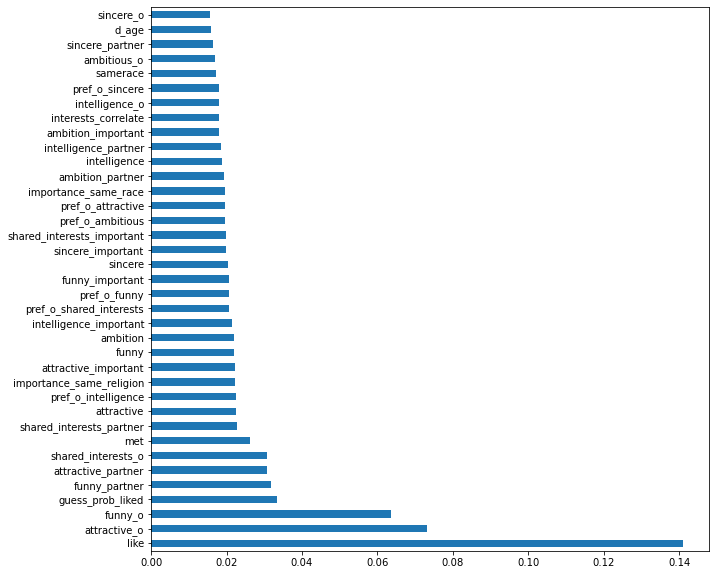

In [93]:
best_model['features'].sort_values(ascending=False).plot(kind='barh', figsize=(10, 10))

Come si può vedere il fatto che sia piaciuto il partner dello speed date e che il partner abbia trovato la persona attraente e divertente sono i principali vettori che ci portano ad avere un match nello speed date.<br>
Essendo comunque presente un numero molto alto di feature, non spiccano percentuali molto alte.